In [10]:
import pandas as pd
df = pd.read_csv('imports-85.data', header=None)

#single filtering
df[df[18]=='?']

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [2]:
#multiple filtering
df[(df[21]=='?') & (df[22]=='?')]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [3]:
#selecting columns
df[df.columns[5:10]].head(3)

,5,6,7,8,9
0,two,convertible,rwd,front,88.6
1,two,convertible,rwd,front,88.6
2,two,hatchback,rwd,front,94.5


In [4]:
df.iloc[0:3,[6,7,25]]

,6,7,25
0,convertible,rwd,13495
1,convertible,rwd,16500
2,hatchback,rwd,16500


In [12]:
import numpy as np
df[df.columns[np.r_[6:8,25]]].head(3)

,6,7,25
0,convertible,rwd,13495
1,convertible,rwd,16500
2,hatchback,rwd,16500


# Aggregating Data

In [17]:
df[df[2]=='bmw'].shape[1]

26

In [24]:
df[df[2]=='bmw'][24].max()

29

In [21]:
df[df[2]=='bmw'][9]

10    101.2
11    101.2
12    101.2
13    101.2
14    103.5
15    103.5
16    103.5
17    110.0
Name: 9, dtype: float64

In [25]:
df[df[2]=='bmw'][24].agg(['mean','min','max'])

mean    25.375
min     20.000
max     29.000
Name: 24, dtype: float64

In [5]:
#Grouping Data by Category Values
df[df[2]=='bmw'].groupby(df.columns[5]).max()

,0,1,2,3,4,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
5,,,,,,,,,,,,,,,,,,,,,
four,1,?,bmw,gas,std,sedan,rwd,front,110.0,197.0,...,209,mpfi,3.62,3.39,9.0,182,5800,23,29,36880
two,2,?,bmw,gas,std,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.39,9.0,182,5800,23,29,41315


In [27]:
#Exercise 1 
for i in range(26):
    nr=df[df[i]=='?'].shape[0]
    if nr>0:
        print(i,':',nr)
#menghitung jumlah row dari setiap kolom yang bernilai null (?)

1 : 41
5 : 2
18 : 4
19 : 4
21 : 2
22 : 2
25 : 4


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 10')]

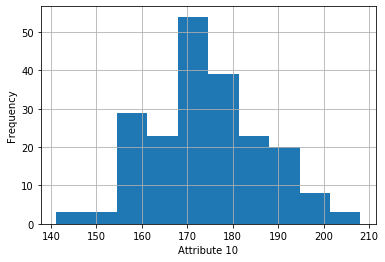

In [53]:
#Histogram for numerical data
import matplotlib as mpl
df[10].hist().set(xlabel='Attribute 10', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 10')]

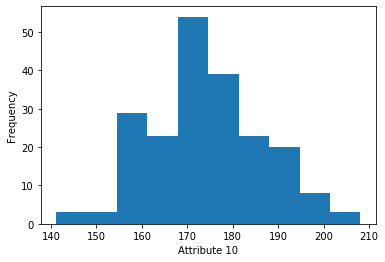

In [55]:
#Histogram using Pandas
df[10].hist(grid=False).set(xlabel='Attribute 10', ylabel='Frequency')

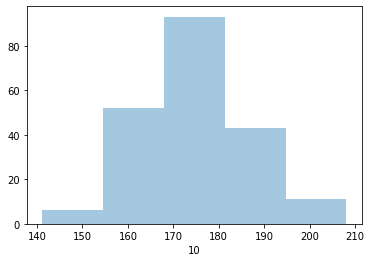

In [56]:
#Histogram using seaborn
import seaborn as sns 
sns.distplot(df[10], kde=False, bins=5)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 10')]

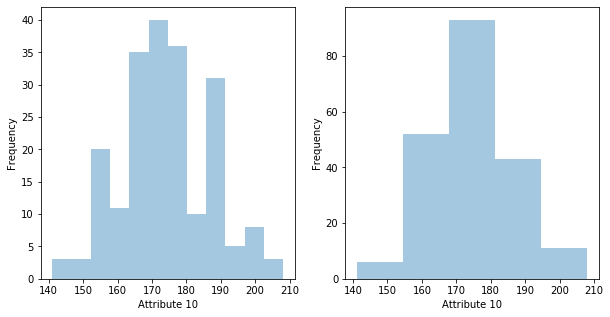

In [57]:
#Parameter bins
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, figsize=(10,5), sharex=True)
sns.distplot(df[10], kde=False, ax=axes[0]).set(xlabel='Attribute 10', ylabel='Frequency')
sns.distplot(df[10], kde=False, bins=5, ax=axes[1]).set(xlabel='Attribute 10', ylabel='Frequency')

[Text(0, 0.5, 'Attribute 25'),
 Text(0.5, 0, 'Attribute 7'),
 Text(0.5, 1.0, 'groupby drive-wheel')]

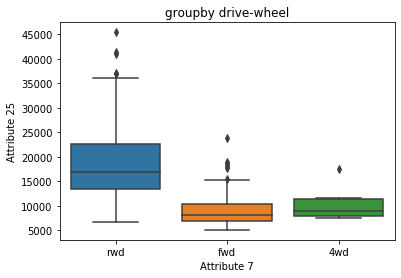

In [76]:
#Boxplot drive-wheels and price
import seaborn as sns
df_price=df[df[25]!='?'][25].astype("int64")
sns.boxplot(y=df_price, 
x=df[7]).set(xlabel='Attribute 7',
ylabel='Attribute 25',title='groupby drive-wheel')

[Text(0, 0.5, 'Attribute 25'), Text(0.5, 0, 'Attribute16')]

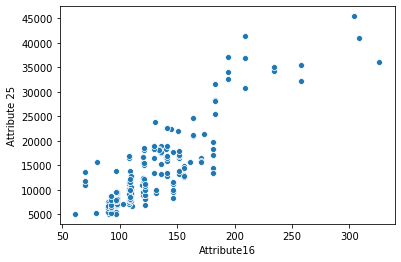

In [79]:
#Scatterplot
import seaborn as sns
df_price=df[df[25]!='?'][25].astype("int64")
sns.scatterplot(x=df[16],y=df_price).set(xlabel='Attribute16', ylabel='Attribute 25')

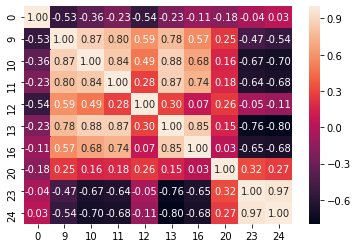

In [81]:
#Correlation coefficient heatmap
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,
annot=True, fmt='.2f')

# Data visualization using wine quality dataset

In [94]:
df = pd.read_csv("winequality-white.csv",sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'fixed acidity')]

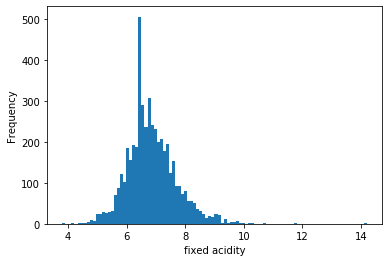

In [97]:
df['fixed acidity'].hist(grid=False, bins=100).set(xlabel='fixed acidity', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Attribute 10')]

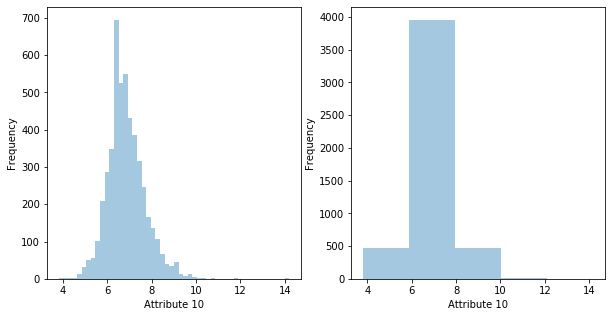

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, figsize=(10,5), sharex=False)
sns.distplot(df['fixed acidity'], kde=False, ax=axes[0]).set(xlabel='Attribute 10', ylabel='Frequency')
sns.distplot(df['fixed acidity'], kde=False, bins=5, ax=axes[1]).set(xlabel='Attribute 10', ylabel='Frequency')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Attribute 10')]

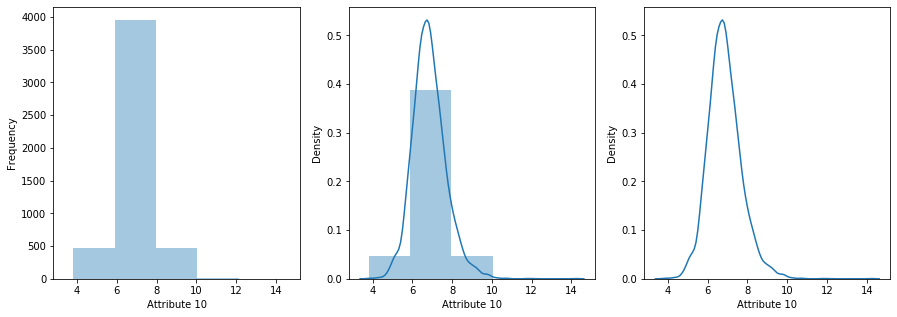

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 3, figsize=(15,5), sharex=True)
sns.distplot(df['fixed acidity'], kde=False, bins=5, ax=axes[0]).set(xlabel='Attribute 10', ylabel='Frequency')
sns.distplot(df['fixed acidity'], bins=5, ax=axes[1]).set(xlabel='Attribute 10', ylabel='Density')
sns.distplot(df['fixed acidity'], bins=5, hist=False, ax=axes[2]).set(xlabel='Attribute 10', ylabel='Density')

[Text(0, 0.5, 'citric acid'), Text(0.5, 0, 'fixed acidity')]

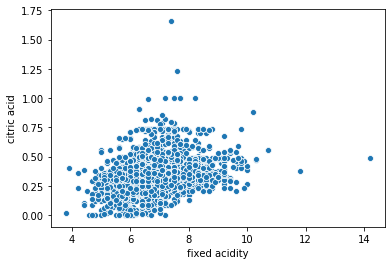

In [115]:
import seaborn as sns
#df_price=df[df[25]!='?'][25].astype("int64")
sns.scatterplot(x=df['fixed acidity'],y=df['citric acid']).set(xlabel='fixed acidity', ylabel='citric acid')

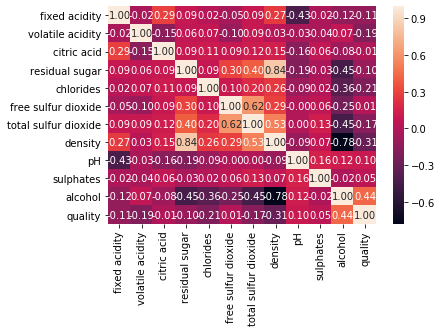

In [116]:
corr = df.corr()
sns.heatmap(corr,
annot=True, fmt='.2f')